In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

from glob import glob

In [2]:
def load_stats(stats_directory: str, tag: str) -> pd.DataFrame:

    check_stats_file = Path(stats_directory) / Path(f"{tag}_check.dat")
    rsplit_file      = Path(stats_directory) / Path(f"{tag}_rsplit.dat")
    cc_file          = Path(stats_directory) / Path(f"{tag}_cc.dat")
    ccstar_file      = Path(stats_directory) / Path(f"{tag}_ccstar.dat")

    for p in [check_stats_file, rsplit_file, cc_file, ccstar_file]:
        if not p.exists():
            raise IOError(f"cannot find {str(p)}")
        
    join_column = 'Center 1/nm'
    colspec = [(0,12), (12,24)]
        
    base_data = pd.read_fwf(check_stats_file, na_values=["-nan"]) #.drop(columns="#")
    rsplit_data = pd.read_fwf(rsplit_file, na_values=["-nan"]).rename(columns={'1/d centre': join_column})
    cc_data = pd.read_fwf(cc_file, colspecs=colspec, na_values=["-nan"]).rename(columns={'1/d centre': join_column})
    ccstar_data = pd.read_fwf(ccstar_file, colspecs=colspec, na_values=["-nan"]).rename(columns={'1/d centre': join_column})

    base_data = base_data.merge(rsplit_data[[join_column, "Rsplit/%"]], on=join_column)
    base_data = base_data.merge(cc_data, on=join_column)
    base_data = base_data.merge(ccstar_data, on=join_column)

    return base_data


class StatsPlot():

    def __init__(self, title=None):
        self.fig, self.axes = plt.subplots(ncols=2, figsize=(8,3))
        self.fig.suptitle(title)
        self.axes[0].set_xlabel(r'd / $\mathrm{\AA}$')
        self.axes[1].set_xlabel(r'd / $\mathrm{\AA}$')
        self.axes[0].set_ylabel("CC")
        self.axes[1].set_ylabel("R split (%)")
        self.axes[0].set_xlim([5,7])

    def add_stat(self, dataframe):
        self.axes[0].plot(dataframe["Center 1/nm"], dataframe["CC"], "o-")
        self.axes[1].plot(dataframe["Center 1/nm"], dataframe["Rsplit/%"], "o-")

    def legend(self, values):
        self.fig.legend(values, loc=3, fontsize=6)

    def show(self):
        self.fig.tight_layout()
        self.fig.show()

## parameter optimization

In [3]:
base_path = Path("/das/work/p21/p21958/merging-optimization")

/das/work/p21/p21958/merging-optimization/minres_2p0
/das/work/p21/p21958/merging-optimization/minres_3p0
/das/work/p21/p21958/merging-optimization/minres_3p5
/das/work/p21/p21958/merging-optimization/minres_2p5
/das/work/p21/p21958/merging-optimization/minres_4p0


/tmp/ipykernel_3864356/4024958959.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


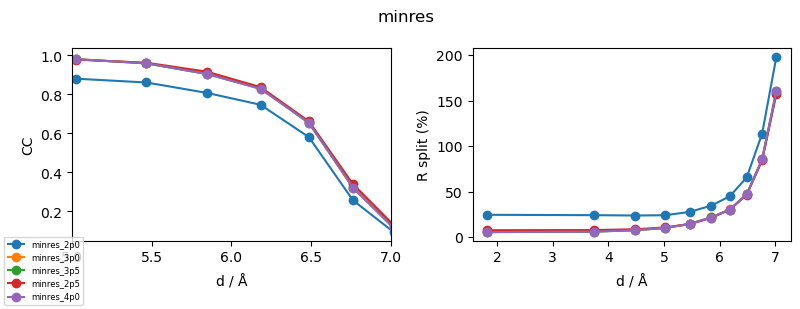

In [4]:
iteration_sp = StatsPlot("minres")
optimization_directories = glob(str(base_path / "minres*"))

tags = []
for dir in optimization_directories:
    
    tag = Path(dir).stem
    
    stats_path = Path(dir) / "stats"

    try:
        df = load_stats(stats_path, tag + "_dark")
        iteration_sp.add_stat(df)
        tags.append(tag)
    except:
        continue
    print(dir)
    #print(df)

iteration_sp.legend(tags)
iteration_sp.show()

In [5]:
df

,Center 1/nm,# refs,Possible,Compl,Meas,Red,SNR,Mean I,d(A),Min 1/nm,Max 1/nm,Rsplit/%,CC,CC*
0,1.817,11362,11361,100.01,59994307,5280.3,27.21,123.38,5.50,0.317,3.316,5.39,0.991223,0.997794
1,3.747,10960,10960,100.00,35030077,3196.2,21.91,32.35,2.67,3.316,4.178,5.83,0.991014,0.997741
2,4.480,10890,10890,100.00,28253219,2594.4,16.01,14.91,2.23,4.178,4.782,7.44,0.987047,0.996735
3,5.023,10827,10827,100.00,25361846,2342.5,10.98,6.75,1.99,4.782,5.263,10.09,0.980532,0.995073
4,5.466,10790,10790,100.00,19225548,1781.8,7.32,3.60,1.83,5.263,5.669,14.42,0.960106,0.989771
5,5.847,10749,10749,100.00,13455591,1251.8,4.89,2.26,1.71,5.669,6.025,21.39,0.904849,0.974704
6,6.183,10743,10743,100.00,9129965,849.9,3.40,1.60,1.62,6.025,6.342,30.19,0.828799,0.952043
7,6.487,10738,10738,100.00,5337117,497.0,2.19,1.12,1.54,6.342,6.631,46.91,0.655448,0.889870
8,6.764,10729,10729,100.00,2187441,203.9,1.23,0.78,1.48,6.631,6.896,85.26,0.322672,0.698505
9,7.020,10723,10723,100.00,617791,57.6,0.68,0.59,1.42,6.896,7.143,160.35,0.114008,0.452417
